In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Warnings
import warnings
warnings.filterwarnings('ignore')

#***Load Dataset:-***

In [4]:
#load the dataset
df = pd.read_csv('/content/personality_dataset.csv')

In [5]:
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


#***EDA(Explotary Data Analysis):-***

In [6]:
#check the shape of dataset
df.shape

(2900, 8)

In [7]:
#check the information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2837 non-null   float64
 1   Stage_fear                 2827 non-null   object 
 2   Social_event_attendance    2838 non-null   float64
 3   Going_outside              2834 non-null   float64
 4   Drained_after_socializing  2848 non-null   object 
 5   Friends_circle_size        2823 non-null   float64
 6   Post_frequency             2835 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


In [21]:
#Check the describe
df.describe()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,2098.000000,2098.000000,2098.000000,2098.000000,2098.00000
mean,4.186368,4.228313,3.246902,6.617731,3.86082
std,3.454599,2.902783,2.255508,4.354215,2.95341
min,0.000000,0.000000,0.000000,0.000000,0.00000
25%,1.000000,2.000000,1.000000,3.000000,1.00000
50%,3.000000,4.000000,3.000000,6.000000,3.00000
75%,7.000000,7.000000,5.000000,10.000000,6.00000
max,11.000000,10.000000,7.000000,15.000000,10.00000


In [8]:
#check the null column
df.isnull().sum()

,0
Time_spent_Alone,63
Stage_fear,73
Social_event_attendance,62
Going_outside,66
Drained_after_socializing,52
Friends_circle_size,77
Post_frequency,65
Personality,0


In [9]:
#drop the null values rows
df.dropna(inplace=True)

In [14]:
#check the duplicated rows
df.duplicated().sum()

np.int64(0)

In [13]:
#drop the duplicated rows
df.drop_duplicates(inplace=True)

In [15]:
#check the shape of dataset
df.shape

(2098, 8)

## Visualize the distribution of numerical features

### Subtask:
Create histograms or box plots for numerical columns to understand their distribution and identify potential outliers.


**Reasoning**:
Identify the numerical columns and create histograms and box plots for each to visualize their distribution and potential outliers.



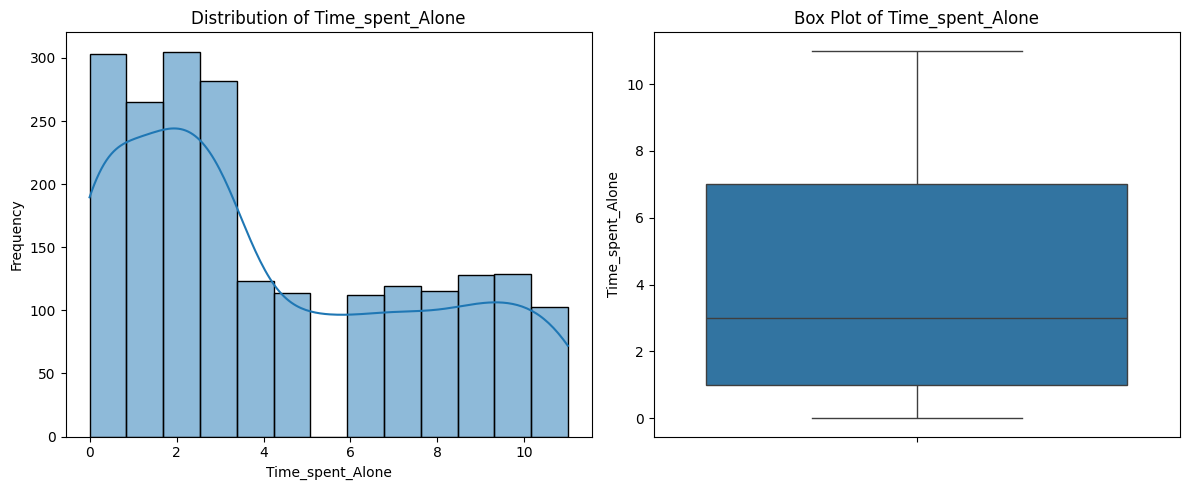

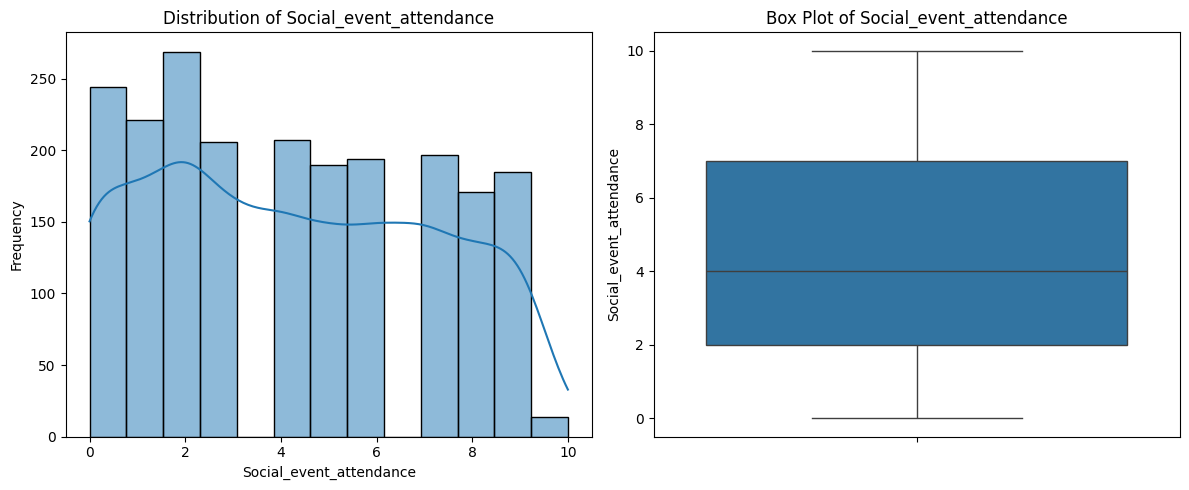

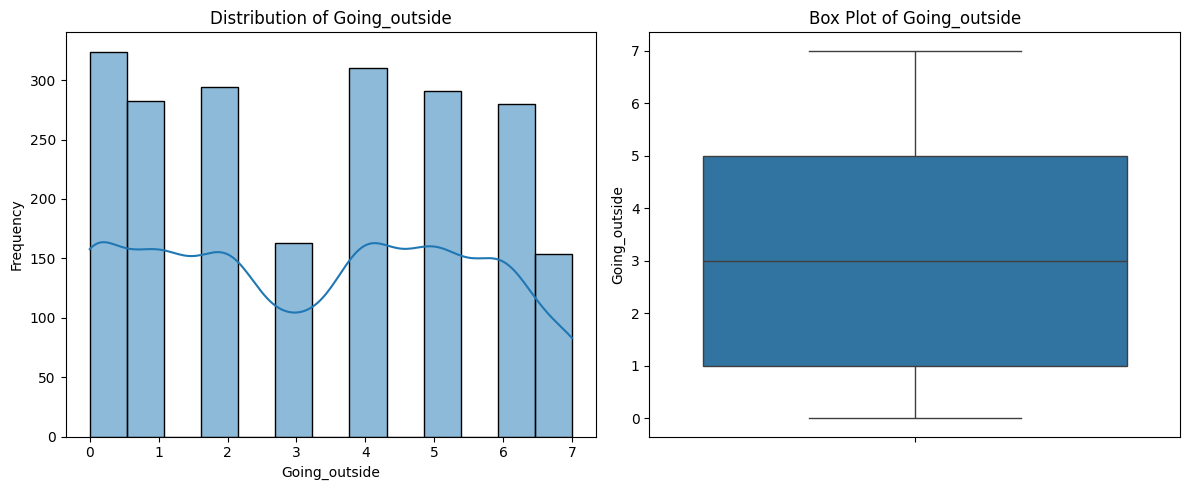

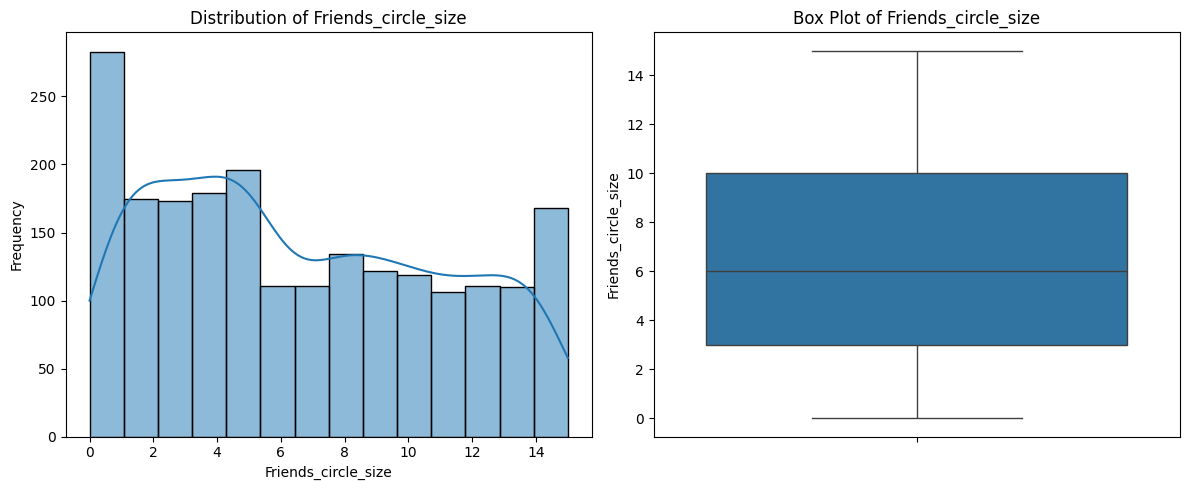

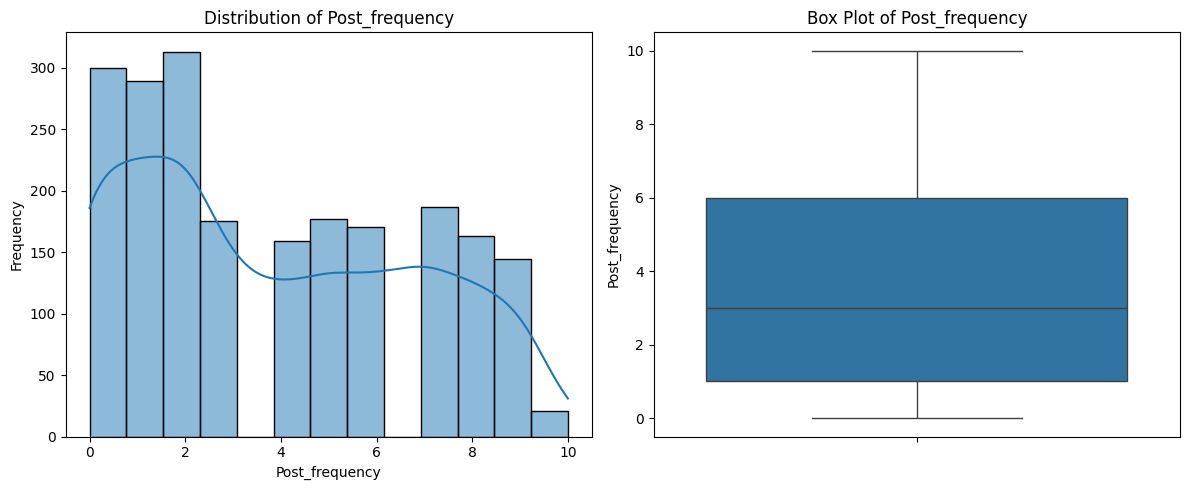

In [16]:
numerical_cols = df.select_dtypes(include=np.number).columns

for col in numerical_cols:
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)

    plt.tight_layout()
    plt.show()

## Visualize the distribution of categorical features

### Subtask:
Create bar plots or count plots for categorical columns to see the frequency of each category.


**Reasoning**:
Identify the categorical columns and create count plots for each to visualize the frequency of their categories.



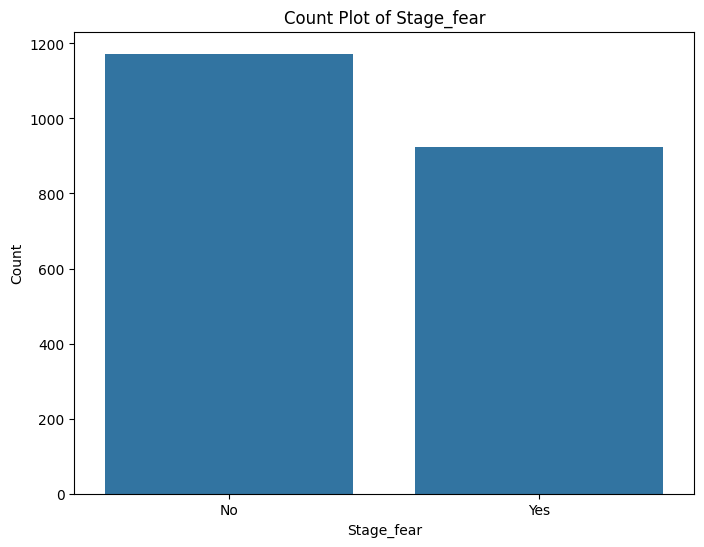

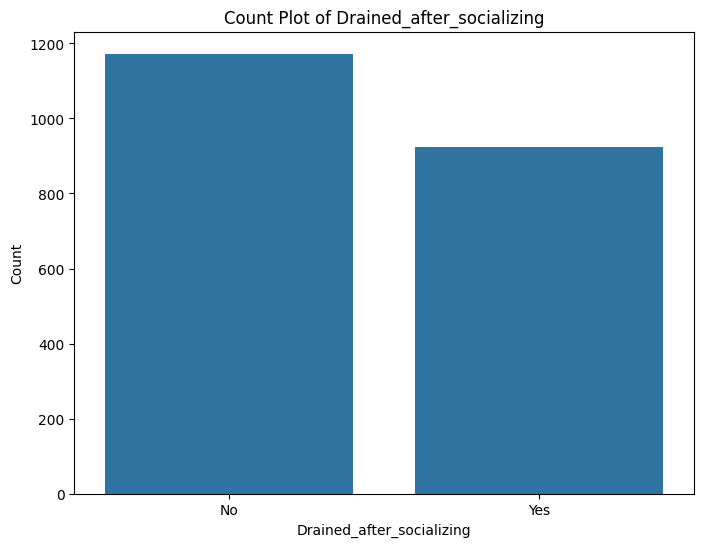

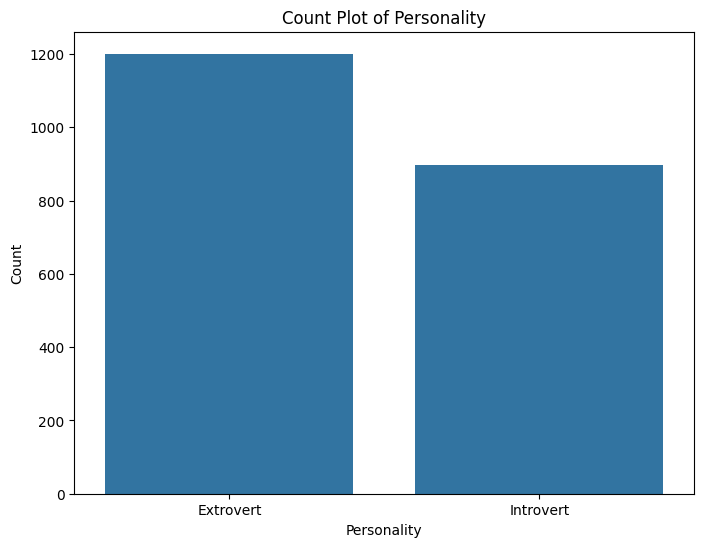

In [17]:
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, data=df)
    plt.title(f'Count Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

## Analyze the relationship between numerical features and 'personality'

### Subtask:
Use box plots or violin plots to compare the distribution of numerical features across different personality types.


**Reasoning**:
Identify the numerical columns and iterate through them to create box plots comparing their distribution across personality types.



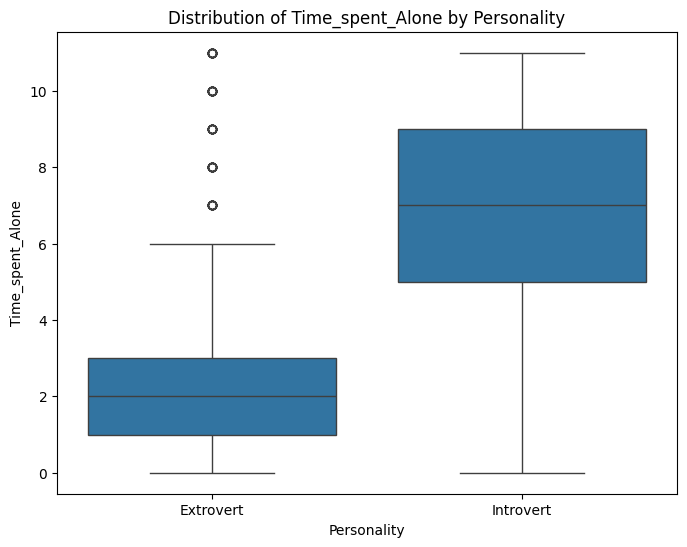

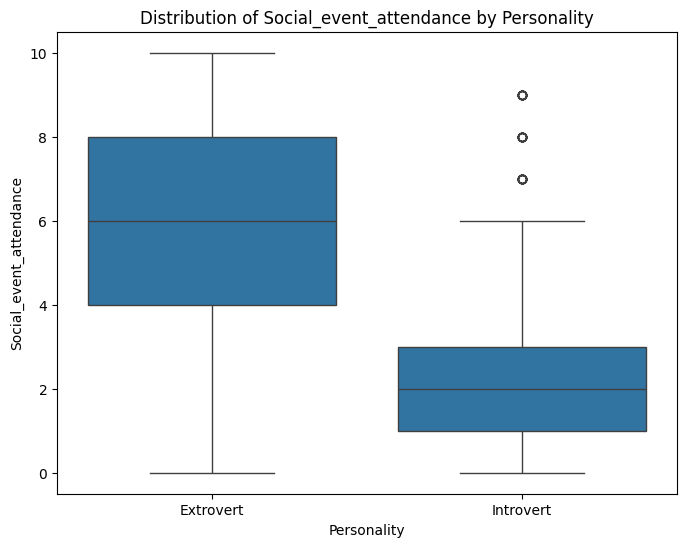

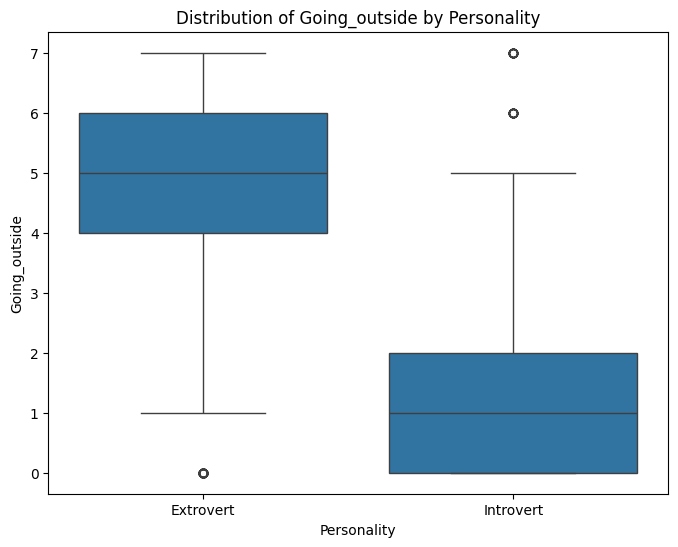

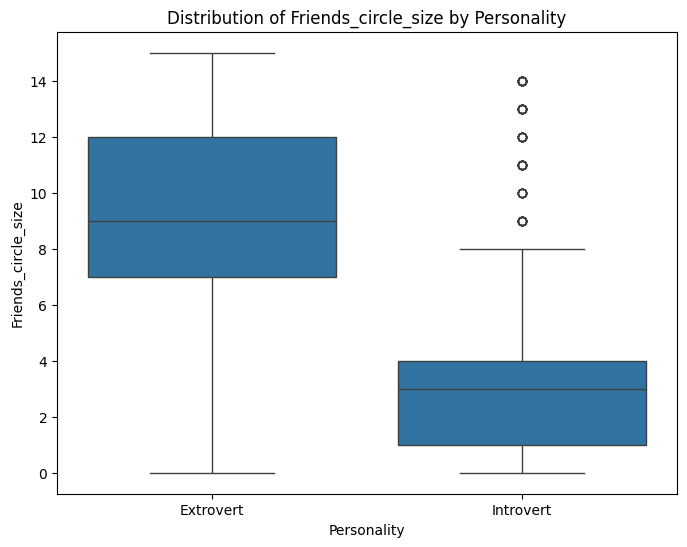

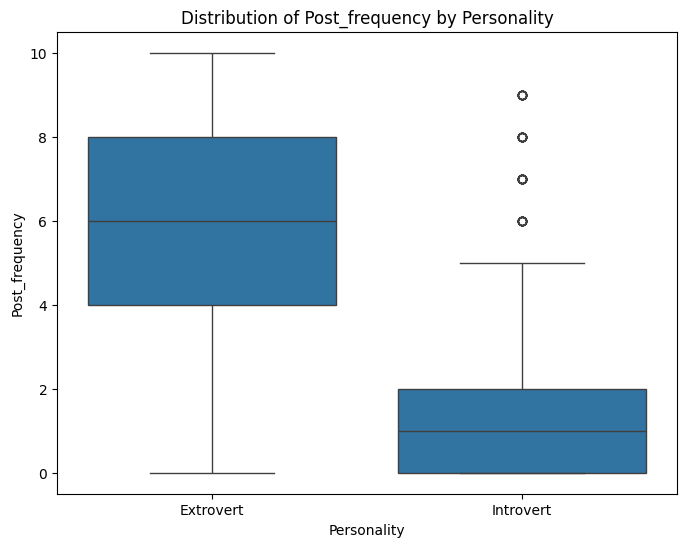

In [18]:
numerical_cols = df.select_dtypes(include=np.number).columns

for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Personality', y=col, data=df)
    plt.title(f'Distribution of {col} by Personality')
    plt.xlabel('Personality')
    plt.ylabel(col)
    plt.show()

## Analyze the relationship between categorical features and 'personality'

### Subtask:
Use grouped bar plots or stacked bar plots to visualize the relationship between categorical features and personality types.


**Reasoning**:
Identify categorical columns and create count plots for each, showing the distribution across personality types.



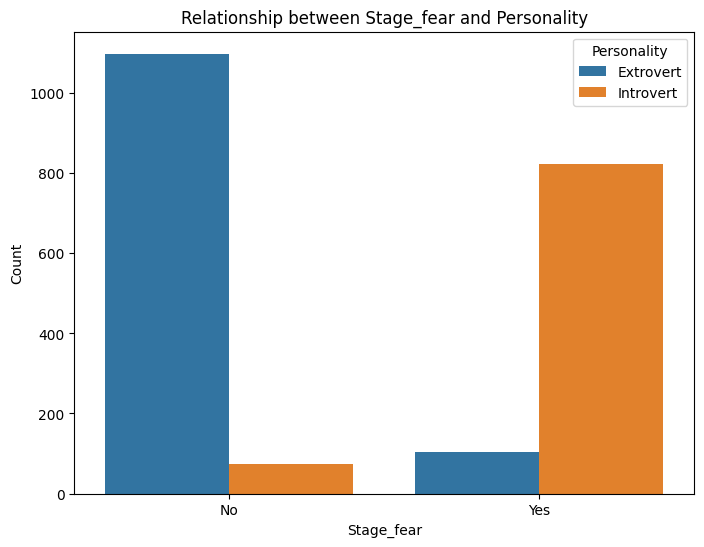

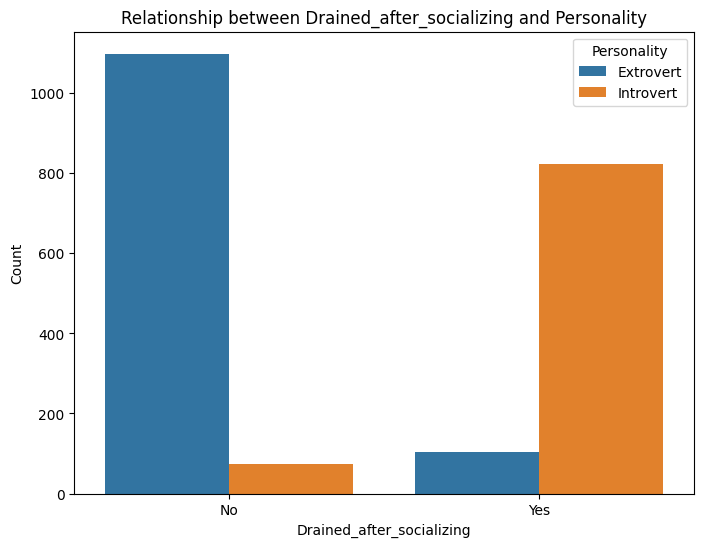

In [19]:
categorical_cols = df.select_dtypes(include='object').columns.drop('Personality')

for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, hue='Personality', data=df)
    plt.title(f'Relationship between {col} and Personality')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

## Visualize correlations between numerical features

### Subtask:
Create a heatmap to visualize the correlation matrix of the numerical features.


**Reasoning**:
Calculate the correlation matrix for the numerical features and then create a heatmap to visualize it.



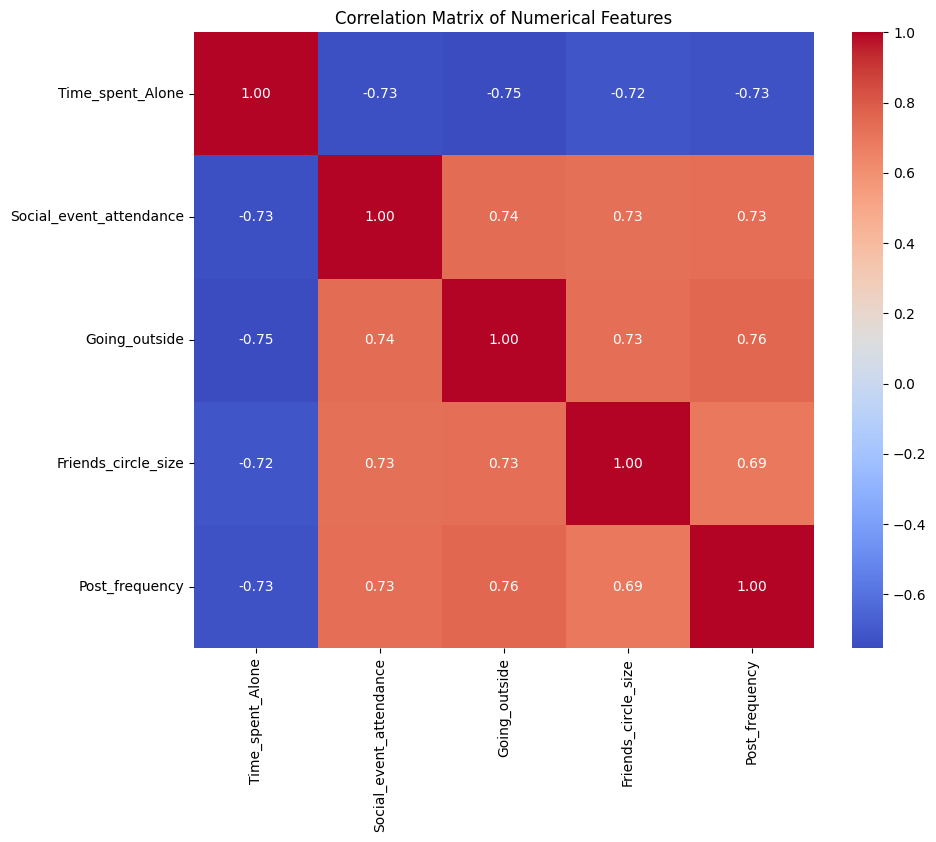

In [20]:
numerical_df = df.select_dtypes(include=np.number)
correlation_matrix = numerical_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.show()

## Summary:

### Data Analysis Key Findings

*   Histograms and box plots were generated for numerical features to visualize their distributions and identify potential outliers.
*   Count plots were created for categorical features to show the frequency of each category.
*   Box plots were used to compare the distribution of numerical features across different personality types.
*   Grouped bar plots were generated to visualize the relationship between categorical features and personality types.
*   A heatmap of the correlation matrix for numerical features was created to visualize correlations.

### Insights or Next Steps

*   Further analysis could involve statistical tests to determine if the observed differences in numerical and categorical feature distributions across personality types are statistically significant.
*   Consider exploring dimensionality reduction techniques or clustering based on the identified features to see if distinct groups align with the personality types.
